In [ ]:
import warnings
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import time

In [ ]:
!nvidia-smi

Sun Jul 27 09:59:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             47W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/driv')

Mounted at /content/driv


In [ ]:
timeinicial= time.time()
path ='/content/driv/MyDrive/deteccao_tumores/dataset_cerebros/nao'
path2 ='/content/driv/MyDrive/deteccao_tumores/dataset_cerebros/sim'
arquivos=[os.path.join(path,f) for f in sorted(os.listdir(path))]
arquivos2=[os.path.join(path2,i) for i in sorted(os.listdir(path2))]


largura, altura=164,164
dataset= [] #informações sobre os pixels
label = [] #tipo de classe

for caminho in arquivos:

  imagem= cv2.imread(caminho)
  imagem = cv2.resize(imagem,(largura, altura)) #redimencionando todas as imagens
  #imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #transformando as imagens para escala de cinza
  #cv2_imshow(imagem)

  dataset.append(np.array(imagem))
  label.append(0)# adiciona a classe não tem tumor


for caminho2 in arquivos2:

  imagem= cv2.imread(caminho2)
  imagem = cv2.resize(imagem,(largura, altura))#redimencionando todas as imagens
  #imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #transformando as imagens para escala de cinza
  #cv2_imshow(imagem)

  dataset.append(np.array(imagem))
  label.append(1)# adiciona classe com tumor


dataset=np.array(dataset)# informação dos pixels
label=np.array(label) # informação das classe
timefinal= time.time()
print(f"duração: {timefinal-timeinicial} segundos")

duração: 270.5147087574005 segundos


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0, shuffle= True)
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [ ]:
model=Sequential()
#1ªcamada de convolução
model.add(Conv2D(32,(3,3),input_shape=(164,164,3)))
model.add(Activation("relu"))#camada de ativação
model.add(MaxPooling2D(pool_size=(2,2)))#trata a questão de diversos angulos da imagem

#2ª camada escondida
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd camada oculta
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(577))
model.add(Activation('relu'))
model.add(Dropout(0.5))#barra de overfiting
model.add(Dense(1))#camada de saida
model.add(Activation('sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 162, 162, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 162, 162, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 81, 81, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 79, 79, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 577)            │     5,982,913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 577)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 577)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           578 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,002,883 (22.90 MB)

 Trainable params: 6,002,883 (22.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#optimizer = keras.optimizers.Adam(lr=0.1)
tempo_inicial=time.time()
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=16,epochs=25, validation_data=(x_test,y_test)) #batchsize siginifica que vamos enviar 16 em 16 imagens para a rede neural, sem misturar as imagens enviando com a ordem que está n
tempo_final=time.time()

tempo_final-tempo_inicial

Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6724 - loss: 0.6213 - val_accuracy: 0.7310 - val_loss: 0.5130
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7220 - loss: 0.5253 - val_accuracy: 0.7701 - val_loss: 0.4759
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7595 - loss: 0.4852 - val_accuracy: 0.7885 - val_loss: 0.4553
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7693 - loss: 0.4861 - val_accuracy: 0.7931 - val_loss: 0.4460
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7903 - loss: 0.4616 - val_accuracy: 0.7862 - val_loss: 0.4470
Epoch 6/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7935 - loss: 0.4326 - val_accuracy: 0.7931 - val_loss: 0.4236
Epoch 7/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7927 - loss: 0.4274 - val_accuracy: 0.7908 - val_loss: 0.4219
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8043 - loss: 0.4245 - val_accuracy: 0

26.069227933883667

In [ ]:
print(f"o codigo demorou {int(tempo_final-tempo_inicial)} segundos")

o codigo demorou 26 segundos


In [ ]:
from sklearn.preprocessing import Binarizer
score = model.evaluate(x_test, y_test)
prediction = model.predict(x_test)
#############
binarizer = Binarizer(threshold=0.50).fit(prediction)
binary = binarizer.transform(prediction)
#############
y_test = y_test
y_pred = binary

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9485 - loss: 0.1403
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
print("classification_report = ")
print(classification_report(y_test,y_pred))

classification_report = 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       309
           1       0.93      0.90      0.91       126

    accuracy                           0.95       435
   macro avg       0.95      0.94      0.94       435
weighted avg       0.95      0.95      0.95       435



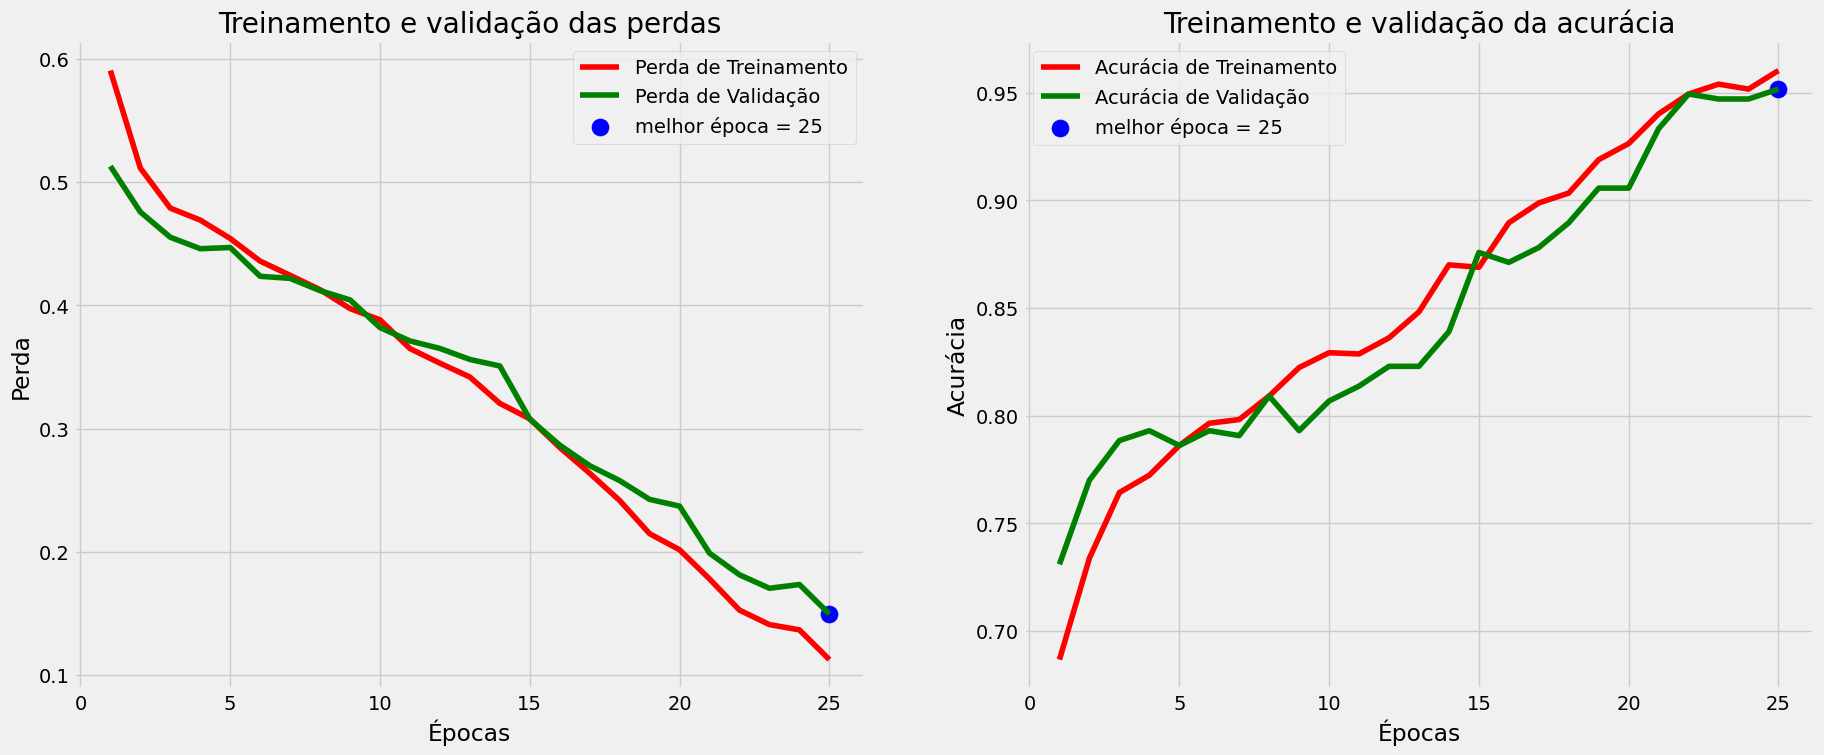

<Figure size 640x480 with 0 Axes>

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the loss and accuracy curve
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='melhor época = '+ str(index_loss+1 +start_epoch)
    vc_label='melhor época = '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Perda de Treinamento')
    axes[0].plot(Epochs,vloss,'g',label='Perda de Validação' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Treinamento e validação das perdas')
    axes[0].set_xlabel('Épocas')
    axes[0].set_ylabel('Perda')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Acurácia de Treinamento')
    axes[1].plot (Epochs,vacc,'g',label= 'Acurácia de Validação')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Treinamento e validação da acurácia')
    axes[1].set_xlabel('Épocas')
    axes[1].set_ylabel('Acurácia')
    axes[1].legend()
    plt.tight_layout

    plt.show()

tr_plot(history,0)
plt.savefig('history.png')
model.save('/content/driv/MyDrive/deteccao_tumores/modelos/modelo_personalizado.h5')

In [ ]:
caminho_modelo = '/content/driv/MyDrive/deteccao_tumores/modelos/modelo_personalizado.h5'
modelo = tf.keras.models.load_model(caminho_modelo)
largura, altura=164,164

\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte/Cópia de Te-no_0277.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte/Cópia de Te-no_0269.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte/Cópia de Te-no_0271.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte/Cópia de Te-no_0272.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte/Cópia de Te-no_0274.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte/Cópia de Te-no_0265.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumo

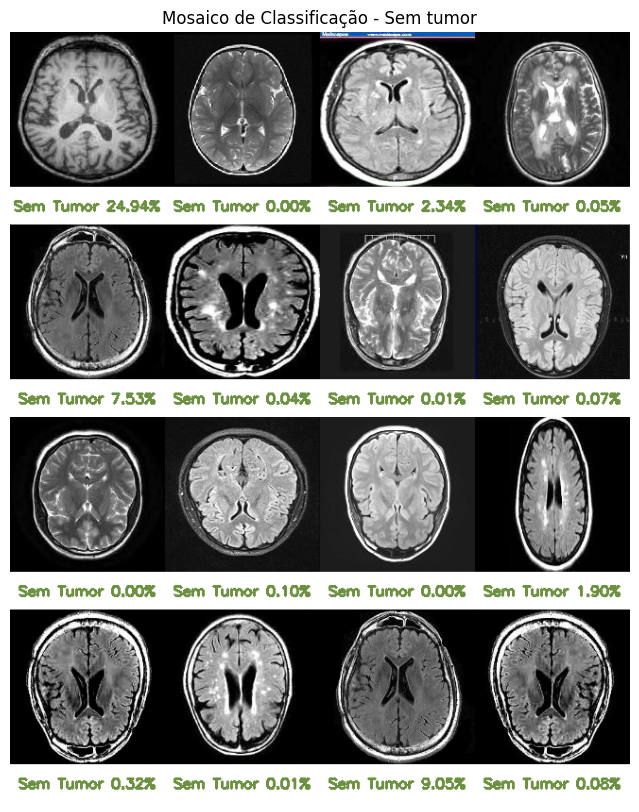

\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte/Cópia de Te-meTr_0004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte/Cópia de Te-meTr_0007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte/Cópia de Te-piTr_0001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte/Cópia de Te-meTr_0003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte/Cópia de Te-meTr_0005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
\Classificando imagem: /content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte/Cópia de Te-meTr_0009.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
\Classificando imagem: /content/driv/MyDrive/d

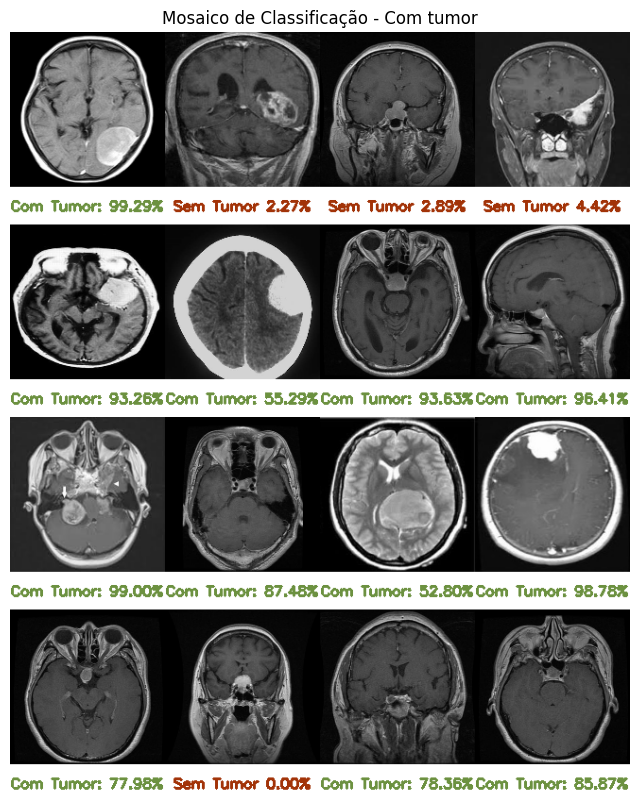

In [ ]:
def criar_mosaico(titulo, cor_sim, cor_nao, arquivos, modelo, rows, cols):
    """
    Cria um mosaico com imagens classificadas e seus respectivos resulktados.
    """
    imagens = []
    for arquivo in arquivos:
        img = cv2.imread(arquivo)
        if img is not None:
            img = cv2.resize(img, (largura, altura))
            imagens.append(img)
        else:
            print(f"Nao foi possivel carregar imagem {arquivo}")

    if not imagens:
        print("Nenhuma imagem carregada.")
        return

    # Define tamanho do mosaico
    img_h, img_w, _ = imagens[0].shape
    texto_h = 40  # Espaço para texto
    mosaico_h = (img_h + texto_h) * rows
    mosaico_w = img_w * cols
    mosaico = np.zeros((mosaico_h, mosaico_w, 3), dtype=np.uint8)
    mosaico.fill(255)


    # Classificação das imagens de RM
    imagem_index = 0
    for r in range(rows):
        for c in range(cols):
            if imagem_index < len(imagens):
                # Place the image
                mosaico[r * (img_h + texto_h):r * (img_h + texto_h) + img_h, c * img_w:(c + 1) * img_w] = imagens[imagem_index]

                # Classificação
                print(f"\Classificando imagem: {arquivos[imagem_index]}")
                # Normaliza imagem e realiza predicao
                img_to_predict = cv2.imread(arquivos[imagem_index])
                img_to_predict = cv2.resize(img_to_predict, (largura, altura))
                img_to_predict = cv2.cvtColor(img_to_predict, cv2.COLOR_BGR2RGB)
                img_to_predict = normalize(img_to_predict, axis=1)
                img_to_predict = img_to_predict.reshape(1, largura, altura, 3)
                predicao = modelo.predict(img_to_predict)
                probabilidade = predicao[0][0] * 100
                # Presença de tunmor: precisao acima de 50%
                if predicao[0][0] > 0.5:
                    texto_img_classificada = f"Com Tumor: {probabilidade:.2f}%"
                    cor = cor_sim # Cor definida para respostas certas/erradas
                    # print(f"Diagnóstico: Tumor Detectado (Probabilidade: {probabilidade:.2f}%)")
                else:
                    texto_img_classificada = f"Sem Tumor {probabilidade:.2f}%"
                    cor = cor_nao
                    # print(f"Diagnóstico: Sem Tumor (Probabilidade de ser tumor: {probabilidade:.2f}%)")

                # Adicionando texto abaixo da imagem
                fonte = cv2.FONT_HERSHEY_SIMPLEX
                fonte_scala = 0.5
                fonte_peso = 2
                text_size, _ = cv2.getTextSize(texto_img_classificada, fonte, fonte_scala, fonte_peso)
                text_x = c * img_w + (img_w - text_size[0]) // 2  # Centralização do texto
                text_y = r * (img_h + texto_h) + img_h + 25 # Posição do texto
                cv2.putText(mosaico, texto_img_classificada, (text_x, text_y), fonte, fonte_scala, cor, fonte_peso)

                imagem_index += 1

    plt.figure(figsize=(10, 10))
    # Conversão para escala RGB
    plt.imshow(cv2.cvtColor(mosaico, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

path_teste_sem_tumor = '/content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/recorte'
path_teste_com_tumor = '/content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor/recorte'
arquivos_com_tumor = []
arquivos_sem_tumor = []
valid_extensions = ['.png', '.jpg', '.jpeg'] # Extensões válidas

def listar_dir(path_pasta):
  arquivos = []
  for nome_arquivo in os.listdir(path_pasta):
      # Extensão
      ext = os.path.splitext(nome_arquivo)[1].lower()

      # Verifica se a extensao do arquivo está na lista de extensões validas
      if ext in valid_extensions:
          path_completo = os.path.join(path_pasta, nome_arquivo)
          arquivos.append(path_completo)

  return arquivos


arquivos_sem_tumor = listar_dir(path_teste_sem_tumor)
arquivos_com_tumor = listar_dir(path_teste_com_tumor)

# Cria mosaico e classifica imagens de teste
criar_mosaico('Mosaico de Classificação - Sem tumor',(8,51,162),(64, 145,108),arquivos_sem_tumor, modelo, rows=4, cols=4)
criar_mosaico('Mosaico de Classificação - Com tumor',(64, 145,108),(8,51,162),arquivos_com_tumor, modelo, rows=4, cols=4)

In [ ]:
def classificacao(titulo, com_tumor, sem_tumor, arquivos, modelo):
    """
    Cria um mosaico com imagens classificadas e seus respectivos resulktados.
    """
    imagens = []
    # Classificação das imagens de RM
    erro = 0
    for arquivo in arquivos:
        img = cv2.imread(arquivo)
        img = cv2.resize(img, (largura, altura))
        imagens.append(img)
        print(f"\Classificando imagem {titulo}: {arquivo}")
        # Normaliza imagem e realiza predicao
        img_to_predict = cv2.imread(arquivo)
        img_to_predict = cv2.resize(img_to_predict, (largura, altura))
        img_to_predict = cv2.cvtColor(img_to_predict, cv2.COLOR_BGR2RGB)
        img_to_predict = normalize(img_to_predict, axis=1)
        img_to_predict = img_to_predict.reshape(1, largura, altura, 3)
        predicao = modelo.predict(img_to_predict)
        probabilidade = predicao[0][0] * 100
        # Presença de tunmor: precisao acima de 50%
        if predicao[0][0] > 0.5:
            texto_img_classificada = f"Com Tumor: {probabilidade:.2f}%"
            if com_tumor == True:
                erro += 1
                print(arquivo)
            print(f"Diagnóstico: Tumor Detectado (Probabilidade: {probabilidade:.2f}%)")
        else:
            texto_img_classificada = f"Sem Tumor {probabilidade:.2f}%"
            print(f"Diagnóstico: Sem Tumor (Probabilidade de ser tumor: {probabilidade:.2f}%)")
            if sem_tumor == True:
                erro += 1
                print(arquivo)
    return erro

path_teste_sem_tumor_todos = '/content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor'
path_teste_com_tumor_todos = '/content/driv/MyDrive/deteccao_tumores/dataset_teste/com_tumor'
arquivos_com_tumor_todos = []
arquivos_sem_tumor_todos = []
valid_extensions = ['.png', '.jpg', '.jpeg'] # Extensões válidas

arquivos_sem_tumor_todos = listar_dir(path_teste_sem_tumor_todos)
arquivos_com_tumor_todos = listar_dir(path_teste_com_tumor_todos)

# Cria mosaico e classifica imagens de teste
erros_sem_tumor = classificacao('sem tumor',True,False,arquivos_sem_tumor_todos, modelo)
erros_com_tumor = classificacao('Mosaico de Classificação - Com tumor',False,True,arquivos_com_tumor_todos, modelo)

print(f"Erros sem tumor: {erros_sem_tumor}")
print(f"Erros com tumor: {erros_com_tumor}")

\Classificando imagem sem tumor: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/Tr-no_0029.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Diagnóstico: Sem Tumor (Probabilidade de ser tumor: 0.00%)
\Classificando imagem sem tumor: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/Tr-no_0051.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Diagnóstico: Sem Tumor (Probabilidade de ser tumor: 0.49%)
\Classificando imagem sem tumor: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/Tr-no_0011.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Diagnóstico: Sem Tumor (Probabilidade de ser tumor: 0.00%)
\Classificando imagem sem tumor: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/Tr-noTr_0004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Diagnóstico: Sem Tumor (Probabilidade de ser tumor: 0.12%)
\Classificando imagem sem tumor: /content/driv/MyDrive/deteccao_tumores/dataset_teste/sem_tumor/Tr-no_0053.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Diagnóstico: Sem 